In [1]:
# %pip install --upgrade pip
%pip install sklearn
%pip install scikit-learn
%pip install pandoc

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install imblearn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
import statistics
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from sklearn.preprocessing import LabelEncoder 
import csv

In [6]:
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics

In [252]:
df = pd.read_csv('heart.csv')

In [253]:
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [254]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


${A. EDA (20 marks):}$

${ Univariate analysis:}$

- Using a histogram, plot a distribution of the numerical values

${ Bivariate analysis:}$

- Plot a histogram showing the age against the target variable (positive vs. negative cases)

- Compare the median age for male and female using a boxplot

${ Multivariate Analysis:}$

- Use a heatmap to check for correlation between predictor variables

$\textbf{Part A}$- Uniivariate Analysis
As per the question, here are the histogram of all the numerical values

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

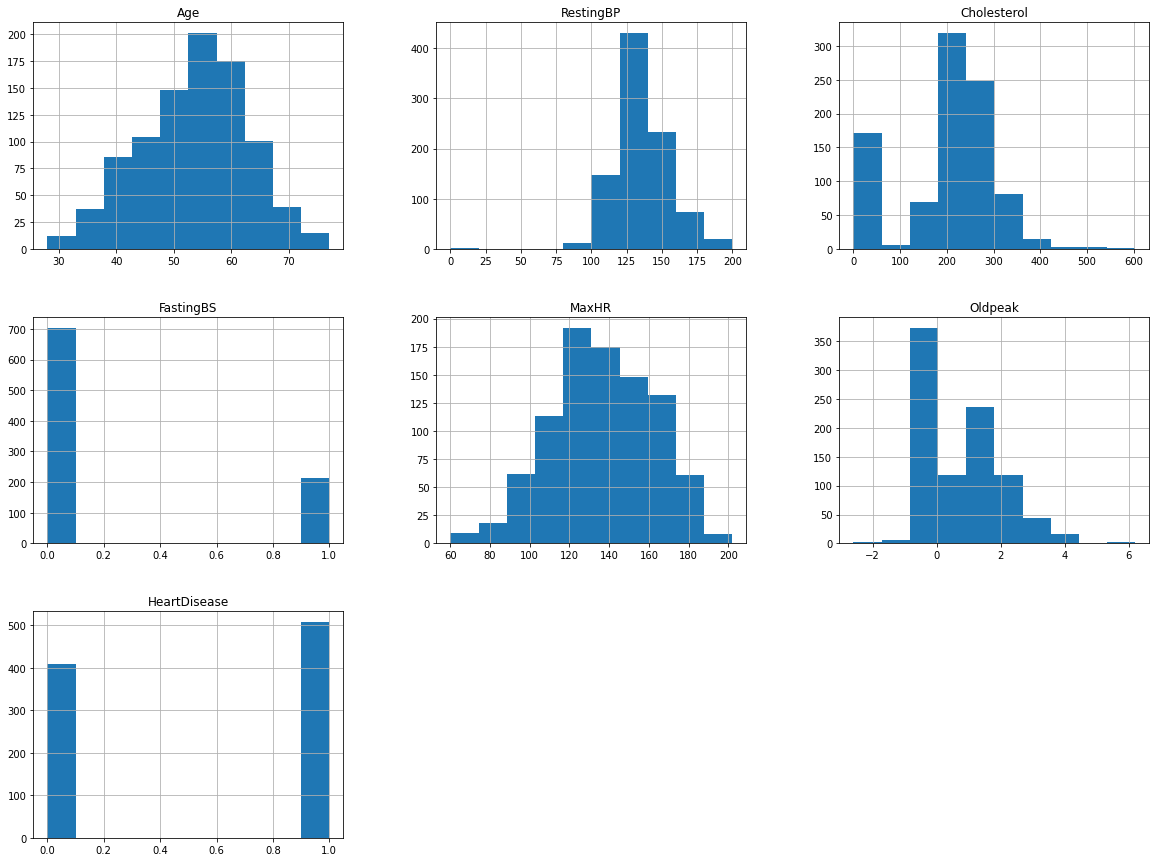

In [255]:
np.random.seed(100)
df.hist(figsize=(20, 15))

$\textbf{Part A}$- Bivariate Analysis

For part A we can see the histogram that is used to plot the graphs. This part shows the positive vs. Negative cases

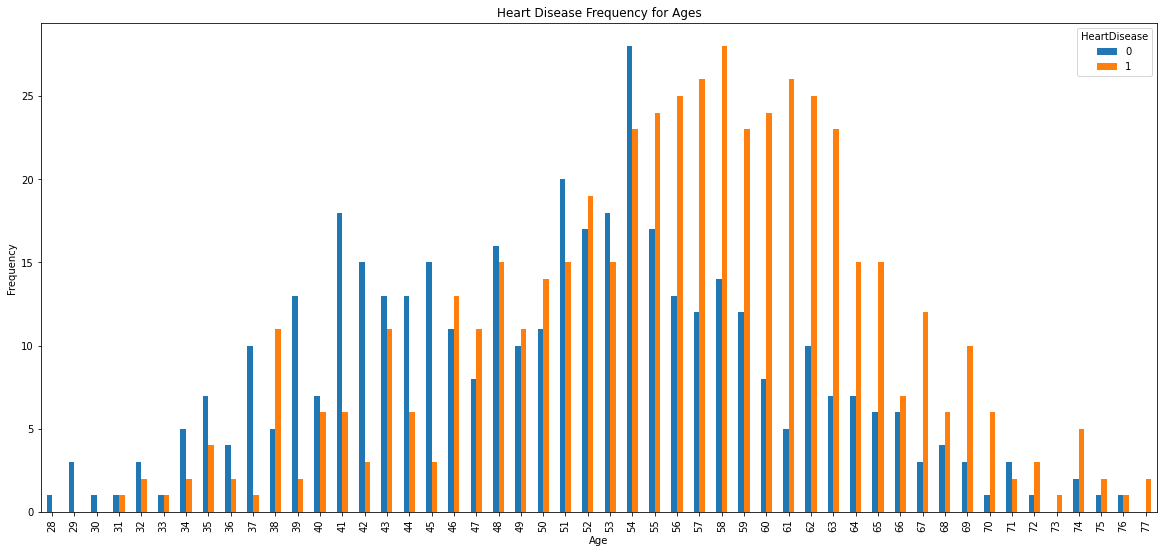

In [256]:
pd.crosstab(df.Age,df.HeartDisease).plot(kind="bar",figsize=(20,9))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

$\textbf{Part A}$- Bivariate Analysis

For part A, here we can see the boxplot that is used. This part shows the boxplot of all the comparison between median age of male and female

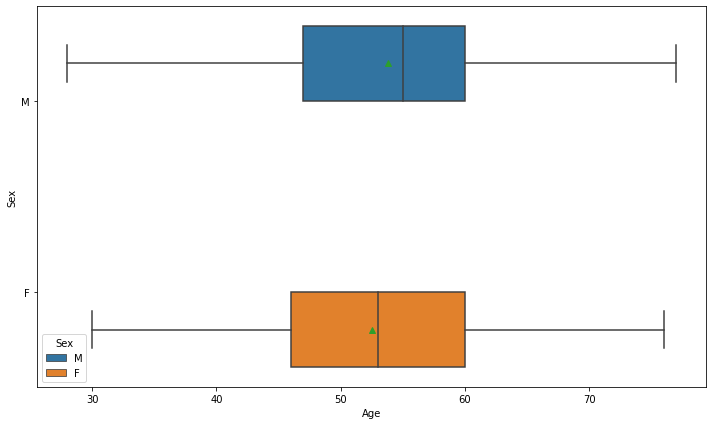

In [257]:
# fig, axs = plt.subplots(2)
fig, ax = plt.subplots(figsize=(12, 7))

bp = sns.boxplot(data = df , x = 'Age' , y = 'Sex' , fliersize=2, hue = 'Sex', showmeans=True)

$\textbf{Part A}$- Multivariate Analysis

For part A we can see the correlation map that is used to plot the graphs. This part shows the correlation heatmap of the relation between the categorical values.

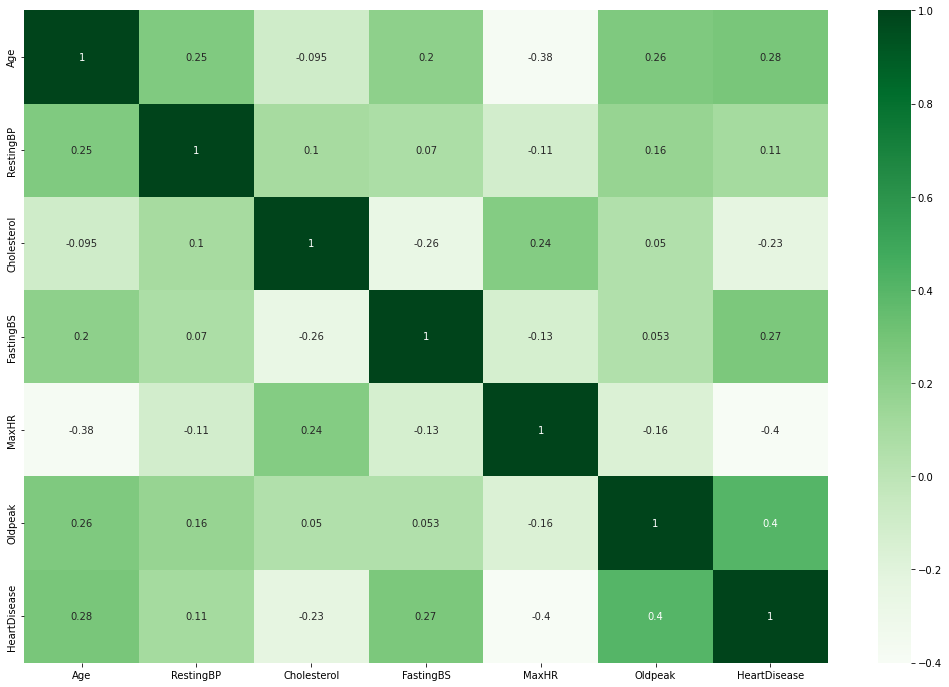

In [258]:
plt.figure(figsize=(18,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

Here we can see that there is strong correlation between Age, Choltesterol, FastingBS, MaxHR, Oldpeak with heartDisease which is out target variable

In [259]:
cor_target = abs(cor["HeartDisease"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Age             0.282039
Cholesterol     0.232741
FastingBS       0.267291
MaxHR           0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [260]:
X = df[['Age','Cholesterol','FastingBS','MaxHR','Oldpeak']]
# our target column is HeartDisease column.
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Here I split the data into training and testing dataset using this code


${B. Feature Engineering (20 marks):}$

- Check for duplicates & missing values. Drop, if present • There are some outliers in the dataset, (e.g., 0 cholesterol, negative oldpeak) handle them before building the model
- Check for class imbalance and handle, if necessary
- Convert categorical data into numerical data using one-hot encoding or any other label encoding approach
- Scale the data using a standard scaler

$\textbf{Part B}$- Removing Missing values and duplicates

Here I made a heatmap to locate any missing values and used duplicated() function to find duplicate values and removed them if there were any

<AxesSubplot:>

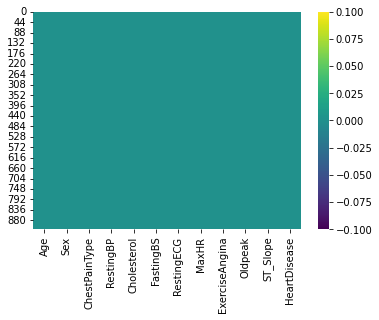

In [261]:
sns.heatmap(df.isnull(), cmap='viridis')

In [262]:
x = df.duplicated()
z = x.to_frame()
print(z)
y = np.where(z==True)
print("Duplicated rows are: ", y)

         0
0    False
1    False
2    False
3    False
4    False
..     ...
913  False
914  False
915  False
916  False
917  False

[918 rows x 1 columns]
Duplicated rows are:  (array([], dtype=int64), array([], dtype=int64))


Here we can see that there are no duplicate rows.

In [263]:
x=[]
y = df.duplicated()
for rows in z.values:
    if rows ==True:
        print(rows)
        x.append(rows)
print(x)

[]


$\textbf{Part B}$- Finding and removing outliers

Here I will be removing the outliers by first writing a loop that detects all columns that has outliers and then replace them with mean values.

0 Age
3 RestingBP
4 Cholesterol
5 FastingBS
7 MaxHR


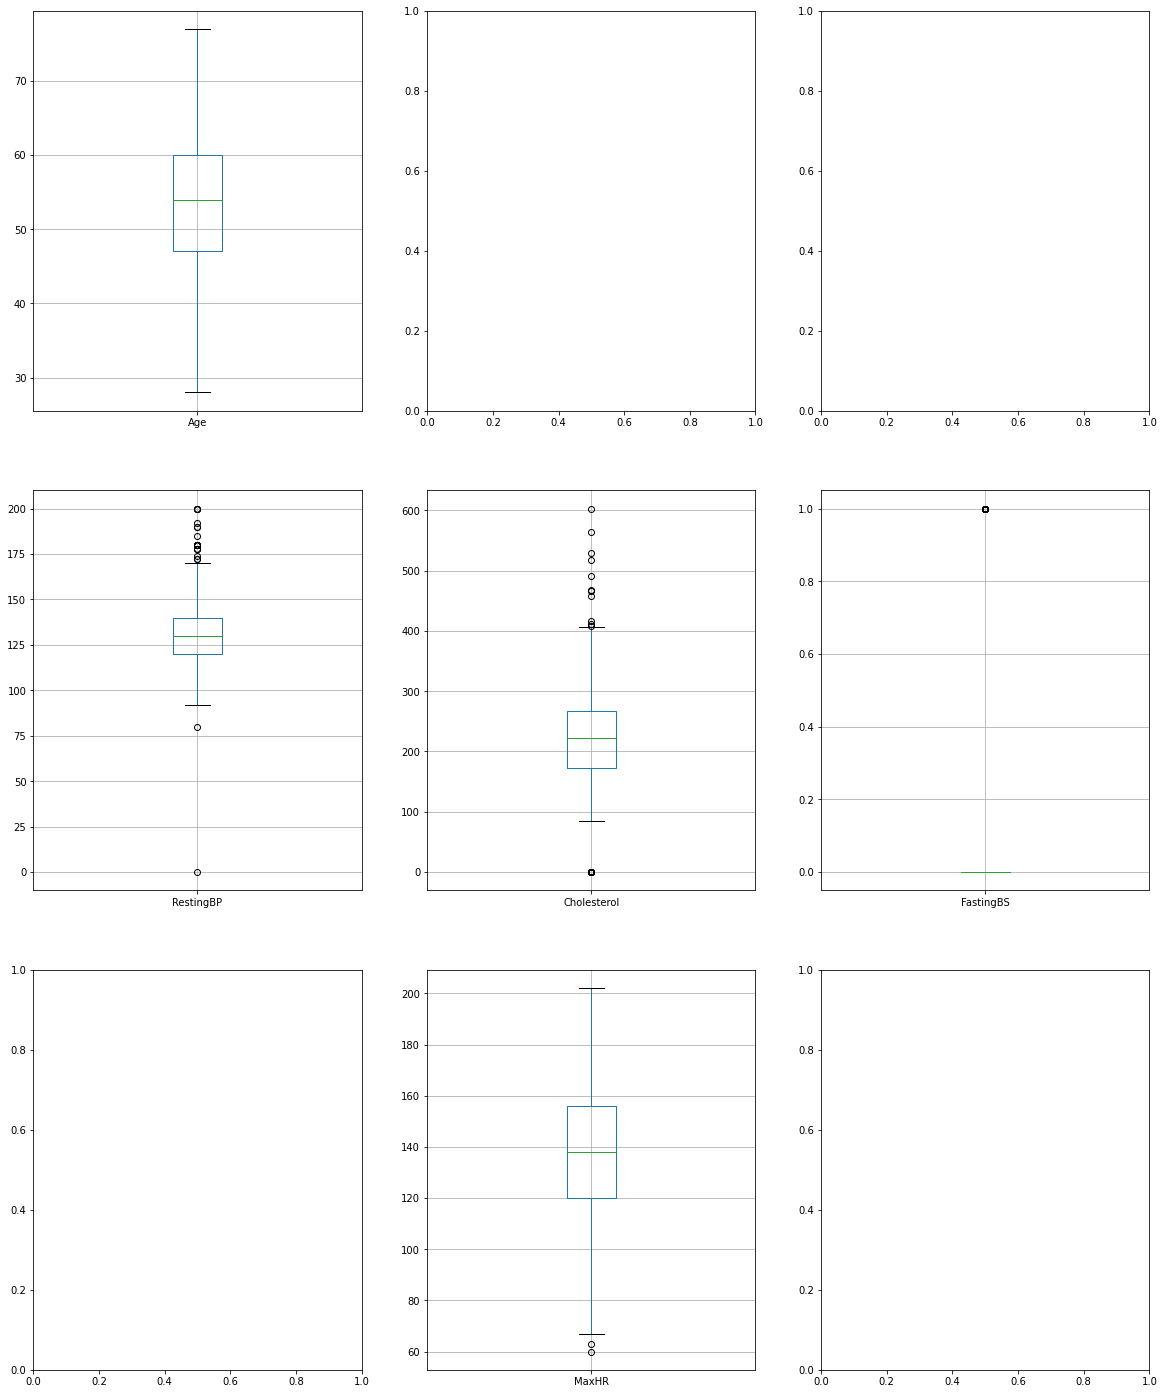

In [264]:
fig, axes = plt.subplots(3, 3, figsize=(20,25))

for i,el in enumerate(list(df.columns.values)[:-1]):
    if (df[str(el)].dtypes)=="int64":
        print(i, el)
        a = df.boxplot(el, ax=axes.flatten()[i])

Age int64
RestingBP int64
Cholesterol int64
FastingBS int64
MaxHR int64
HeartDisease int64


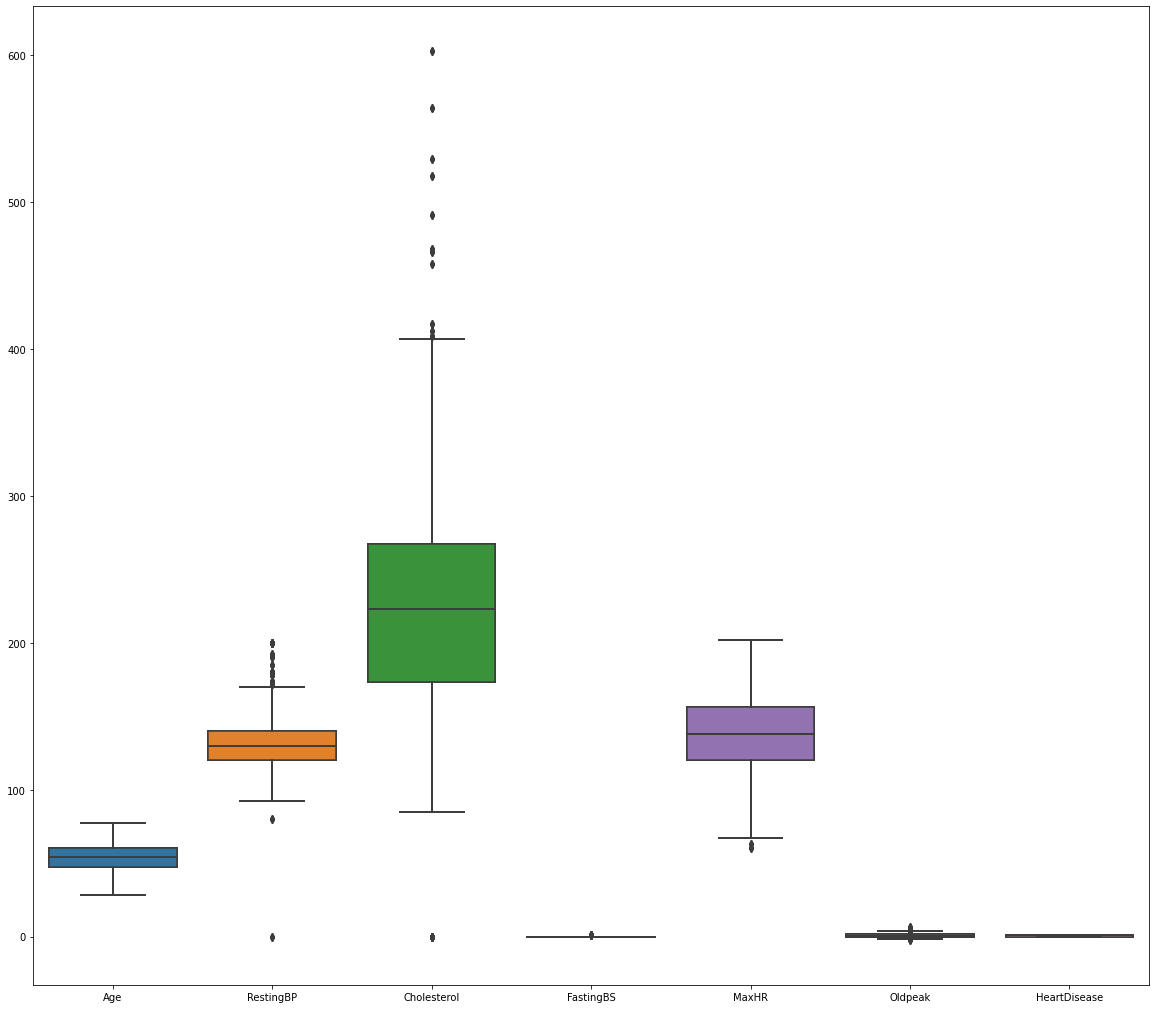

In [265]:
fig, ax = plt.subplots(figsize=(20,18))
# print(df.columns)
''' This is just another way of representing the plot, 
checking if i missed any column as this shows all the columns with numeric values'''

for columns in df.columns:
    if (df[str(columns)].dtypes)=="int64":
        print(columns, (df[str(columns)].dtypes))
        sns.boxplot(data=df)


Below is the code for finding outliers and replacing them with nan values. For this I ran a loop through the dataset and replaced any value outside the quantile with nan values.

In [267]:
outlier_columns = ['RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS']

for z in outlier_columns:
    for x in [str(z)]:
        print(x)
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        print(max)
        print(min)
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

RestingBP
170.0
90.0
Cholesterol
407.625
32.625
MaxHR
210.0
66.0
FastingBS
0.0
0.0


In [268]:
df.isnull().sum()
#showing any columns that has nan values

Age                 0
Sex                 0
ChestPainType       0
RestingBP          28
Cholesterol       183
FastingBS         214
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

Now I will replace all the nan values with mean values.

In [269]:
df_columns = ['Age','RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS']
#taking only the columns which has outliers
for columns in df_columns:
    median = df[columns].median()
    mean = df[columns].mean()
    df[columns].fillna(mean,inplace=True)
    #replacing the nan value with mean value
    z= df[columns].isnull().sum()
    print("mean of {columns} is: ".format(columns=columns), mean)
    print("median of {columns} is: ".format(columns=columns), median)
    print("null count of {columns} is: ".format(columns=columns), z)
# df.fillna(median,inplace=True)

mean of Age is:  53.510893246187365
median of Age is:  54.0
null count of Age is:  0
mean of RestingBP is:  131.1134831460674
median of RestingBP is:  130.0
null count of RestingBP is:  0
mean of Cholesterol is:  241.03809523809525
median of Cholesterol is:  236.0
null count of Cholesterol is:  0
mean of MaxHR is:  136.97379912663754
median of MaxHR is:  138.0
null count of MaxHR is:  0
mean of FastingBS is:  0.0
median of FastingBS is:  0.0
null count of FastingBS is:  0


Checking again to see if there are any nan values

In [270]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

$\textbf{Part B}$- Checking for class imbalance and handling them.

There are only two columns for this= FastingBS and HeartDisease. As we can see there is greater imbalance for FastingBS column then HeartDisease

In [266]:
# class count
columns = ['FastingBS','HeartDisease']

class_count_0, class_count_1 = df['FastingBS'].value_counts()

# Separate class
class_0 = df[df['FastingBS'] == 0]
class_1 = df[df['FastingBS'] == 1]# print the shape of the class
print('class 0-FastingBS:', class_0.shape)
print('class 1-FastingBS:', class_1.shape)

class 0-FastingBS: (704, 12)
class 1-FastingBS: (214, 12)


Using oversampling to nullify the class imbalance for both the columns:

total class of 1 and 0: 1    704
0    704
Name: FastingBS, dtype: int64


<AxesSubplot:title={'center':'count for FastingBS'}>

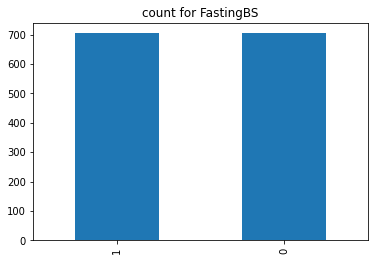

In [271]:
class_1_over = class_1.sample(class_count_0, replace=True)
#using random oversampling for class imbalance
test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['FastingBS'].value_counts())# plot the count after under-sampeling
test_over['FastingBS'].value_counts().plot(kind='bar', title='count for FastingBS')

Since FastingBS column has a huge class imbalance, i fixed it using random over sampling.

In [272]:
class_count_0, class_count_1 = df['HeartDisease'].value_counts()

# Separate class
class_0 = df[df['HeartDisease'] == 0]
class_1 = df[df['HeartDisease'] == 1]# print the shape of the class
print('class 0-HeartDisease:', class_0.shape)
print('class 1-HeartDisease:', class_1.shape)

class 0-HeartDisease: (410, 12)
class 1-HeartDisease: (508, 12)


There was a slight imbalance for HeartDisease as well and so did the same with HeartDisease

total class of 1 and 0: 1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot:title={'center':'count for HeartDisease (target)'}>

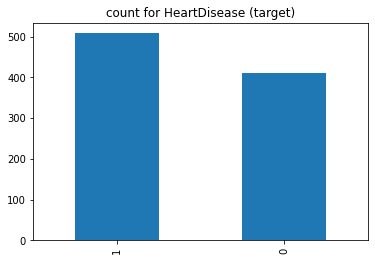

In [273]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['HeartDisease'].value_counts())# plot the count after under-sampeling
test_over['HeartDisease'].value_counts().plot(kind='bar', title='count for HeartDisease (target)')

In [274]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Now we use label encoding to convert all categorical data, I approached this process using label encoding instead of One Hot encoding.

Converted categorical data into numerical data using label encoding approach

In [276]:
label_pre= preprocessing.LabelEncoder()
label_encoder = LabelEncoder()
#encoding only five columns as they are the columns that need to be encoded as they are categorical values.
df.ST_Slope = label_encoder.fit_transform(df.ST_Slope)
df.ExerciseAngina = label_encoder.fit_transform(df.ExerciseAngina)
df.RestingECG= label_pre.fit_transform(df.RestingECG)
df.Sex= label_pre.fit_transform(df.Sex)
df.ChestPainType= label_pre.fit_transform(df.ChestPainType)
print(df.Sex.unique())
print(df)

[1 0]
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1      140.0        289.0        0.0           1   
1     49    0              2      160.0        180.0        0.0           1   
2     37    1              1      130.0        283.0        0.0           2   
3     48    0              0      138.0        214.0        0.0           1   
4     54    1              2      150.0        195.0        0.0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3      110.0        264.0        0.0           1   
914   68    1              0      144.0        193.0        0.0           1   
915   57    1              0      130.0        131.0        0.0           1   
916   57    0              1      130.0        236.0        0.0           0   
917   38    1              2      138.0        175.0        0.0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope

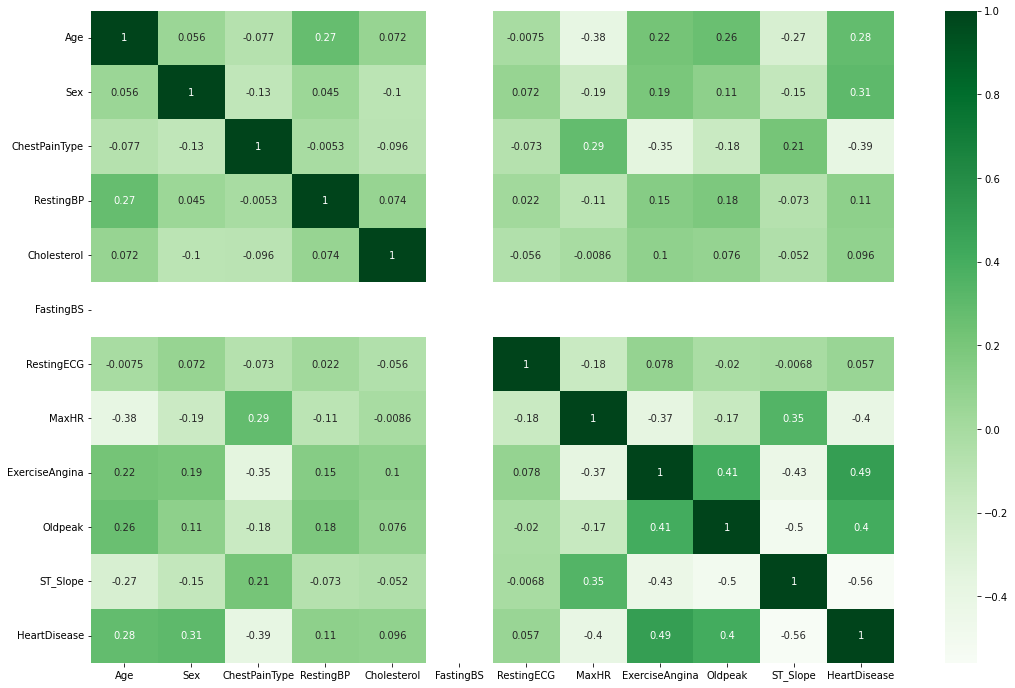

In [277]:
plt.figure(figsize=(18,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

In [278]:
cor_target = abs(cor["HeartDisease"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Age               0.282039
Sex               0.305445
ChestPainType     0.386828
MaxHR             0.398445
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

Scaling the data using MinMaxScaler 

In [279]:
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(df[['Age','Cholesterol','FastingBS','MaxHR','Oldpeak']])
print(min_max_scaled)

[[0.24489796 0.63354037 0.         0.77777778 0.29545455]
 [0.42857143 0.29503106 0.         0.65925926 0.40909091]
 [0.18367347 0.61490683 0.         0.22962963 0.29545455]
 ...
 [0.59183673 0.14285714 0.         0.35555556 0.43181818]
 [0.59183673 0.4689441  0.         0.79259259 0.29545455]
 [0.20408163 0.27950311 0.         0.78518519 0.29545455]]


In [ ]:
splitting the dataset again as now the dependant variables has changed

In [280]:
X = df[['Age','FastingBS','MaxHR','Oldpeak', 'Sex', 'ChestPainType', 'ExerciseAngina']]
# our target column is HeartDisease column.
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Calculating the best Decision Tree model

In [281]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
print("Best model is: ", grid_search_cv.best_estimator_)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Best model is:  DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)


$\textbf{C. Model Development I (20 marks):}$ 
Ensemble Method: 
    • Use a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (ensure you find optimal tree), and XGboost classifiers. Note: In majority voting, the predicted class
label for a particular sample is the class label that represents the majority of the class labels predicted by each individual classifier.

In [208]:
clf1 = DecisionTreeClassifier(max_leaf_nodes=23, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='rbf', probability=True)
clf4 = XGBClassifier(use_label_encoder=False)
eval_clf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3), ('xgb', clf4)],  voting='hard')
clf_dt = clf1.fit(X, y)
clf_knn = clf2.fit(X, y)
clf_svc = clf3.fit(X, y)
clf_xgb = clf4.fit(X, y)
eval_clf_predict = eval_clf.fit(X, y)

[23:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [209]:
y_pred_dt = clf1.predict(X_test)
y_pred_knn= clf2.predict(X_test)
y_pred_svc= clf3.predict(X_test)
y_pred_xgb= clf4.predict(X_test)
y_pred_eval= eval_clf.predict(X_test)

In [210]:
print(y_pred_dt)
print(y_pred_knn)
print(y_pred_svc)
print(y_pred_xgb)
print(y_pred_eval)

[1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1]
[0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1

In [211]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       113
           1       0.87      0.87      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [212]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       113
           1       0.82      0.79      0.81       163

    accuracy                           0.78       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.78      0.78      0.78       276



In [213]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       113
           1       0.70      0.82      0.76       163

    accuracy                           0.69       276
   macro avg       0.68      0.66      0.66       276
weighted avg       0.68      0.69      0.68       276



In [214]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.99      0.98      0.99       163

    accuracy                           0.99       276
   macro avg       0.98      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



In [215]:
print(metrics.classification_report(y_test, y_pred_eval))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       113
           1       0.92      0.84      0.88       163

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276



In [113]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Now I am trying a second approach to validate the first approach

In [216]:
import tensorflow as tf

In [217]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBRegressor
#Second approach to validate whether the first approach was correct
# get the dataset
def get_dataset():
    X_x, y_y = X_train, y_train
    return X_x, y_y
 


In [218]:
# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('dt', DecisionTreeRegressor(max_leaf_nodes=23, random_state=42)))
    models.append(('knn', neighbors.KNeighborsRegressor(n_neighbors = 5)))
    models.append(('SVC', SVR(kernel='rbf')))
    models.append(('XGB', XGBRegressor(use_label_encoder=False)))
    # define the voting ensemble
    ensemble = VotingRegressor(estimators=models)
    return ensemble
 


In [219]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['dt'] = DecisionTreeRegressor(max_depth=4)
    models['knn'] = neighbors.KNeighborsRegressor(n_neighbors = 5)
    models['SVC'] = SVC(kernel='rbf', probability=True)
    models['XGB'] = XGBClassifier(use_label_encoder=False)
    models['voting'] = get_voting()
    return models
 


In [220]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_x, y_y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_x, y_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 


In [221]:
# define dataset
X_x, y_y = get_dataset()
# get the models to evaluate
models = get_models()

In [222]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_x, y_y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dt -0.285 (0.039)
>knn -0.378 (0.033)
>SVC -0.310 (0.053)
>XGB -0.244 (0.058)
>voting -0.320 (0.030)


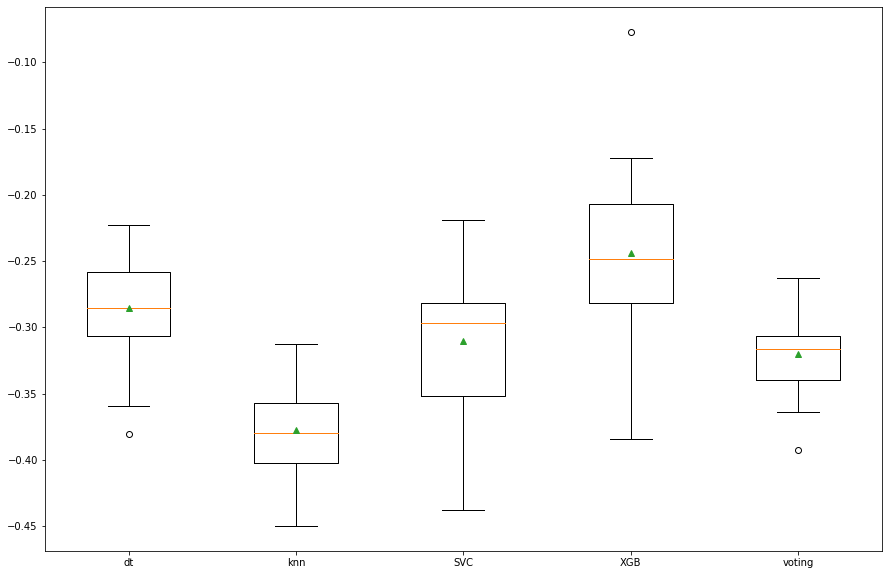

In [223]:
fig, ax = plt.subplots(figsize=(15,10))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

$\textbf{D. Model Development II (20 marks):}$
Deep Learning:
• Train a deep neural network using Keras with 3 dense layers
• Try changing the activation function or dropout rate. What effects does any of these have on the result?

In [224]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

Here I tried 3 different ways to train the model and tested it out by not using dropout, using different activation functions (relu, tanh, sigmoid and softmax) to see how the result varies

In [282]:
# define a function to build the keras model

def create_model():
    
    # create model
    
    model = Sequential()
    model.add(Dense(32, input_dim=7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                256       
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dropout_23 (Dropout)        (None, 16)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
None


In [283]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
65/65 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4611 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4704 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4595 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4611 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4626 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4626 - val_loss: 0.0000e+00 - val_accuracy: 0.4094
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4626 - val_loss

In [286]:
y_pred_keras= model.predict(X_test)

In [287]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred, zero_division=1))

Results for Categorical Model
0.40942028985507245
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       113
           1       1.00      0.00      0.00       163

    accuracy                           0.41       276
   macro avg       0.70      0.50      0.29       276
weighted avg       0.76      0.41      0.24       276



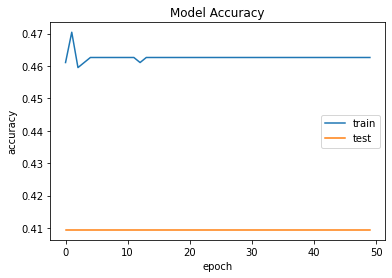

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [289]:
def create_model():
    
    # create model
    
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='softmax'))
    
    # compile model
    
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 16)                128       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________
None


In [290]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
65/65 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss: 0.0000e+00 - val_accuracy: 0.5906
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5374 - val_loss

In [291]:
y_pred_keras= model.predict(X_test)

In [292]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred, zero_division=1))

Results for Categorical Model
0.40942028985507245
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       113
           1       1.00      0.00      0.00       163

    accuracy                           0.41       276
   macro avg       0.70      0.50      0.29       276
weighted avg       0.76      0.41      0.24       276



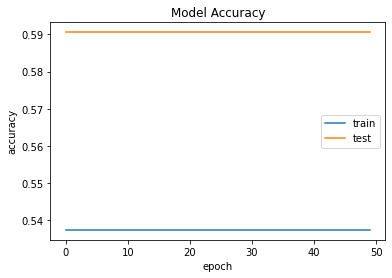

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline

# Model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [294]:
# define the keras model
models = Sequential()
models.add(Dense(32, input_dim=7, activation='tanh'))
models.add(Dense(16, activation='tanh'))
models.add(Dense(1, activation='sigmoid'))

In [295]:
# compile the keras model
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [296]:
# fit the keras model on the dataset

model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 6/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 9/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5534
Epoch 10/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+0

In [241]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred, zero_division=1))

Results for Categorical Model
0.40942028985507245
              precision    recall  f1-score   support

           0       0.41      1.00      0.58       113
           1       1.00      0.00      0.00       163

    accuracy                           0.41       276
   macro avg       0.70      0.50      0.29       276
weighted avg       0.76      0.41      0.24       276



$\textbf{E. Model Comparison, Evaluation (20 marks):}$
• Compare the results of the ensemble with the deep neural network model in terms of the following criteria: precision, recall, accuracy, F-measure.
• Identify the model that performed best and worst according to each criterion.

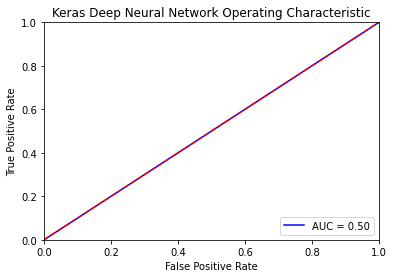

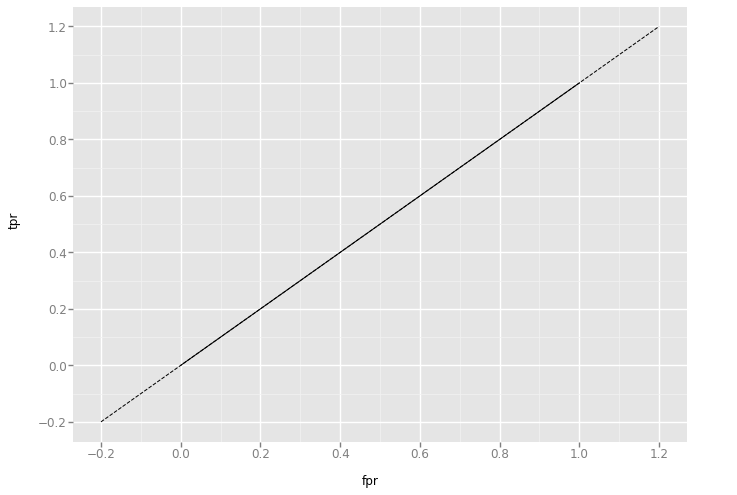

<ggplot: (80170661093)>

In [242]:

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_keras)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Keras Deep Neural Network Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

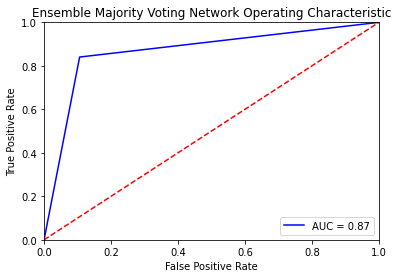

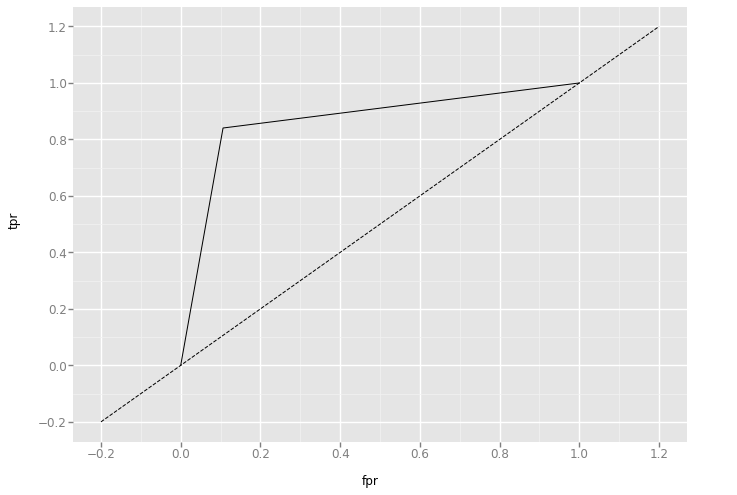

<ggplot: (80171162748)>

In [243]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_eval)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Ensemble Majority Voting Network Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

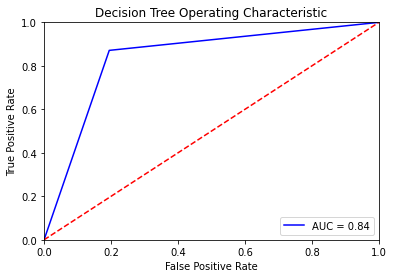

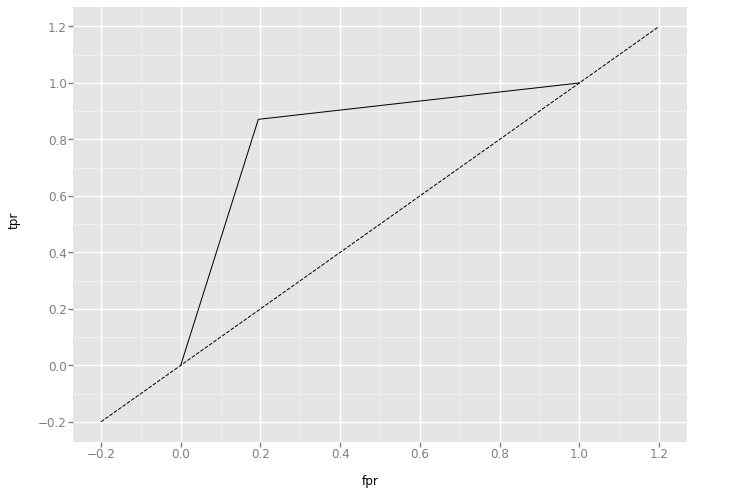

<ggplot: (80170609270)>

In [244]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Decision Tree Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

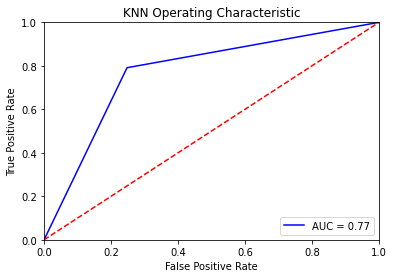

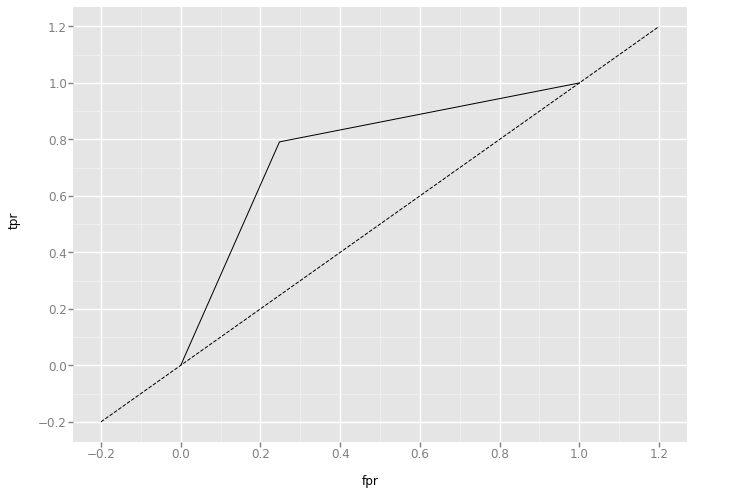

<ggplot: (80165514716)>

In [245]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('KNN Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

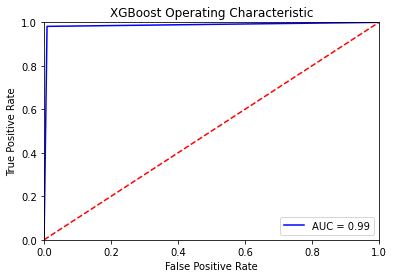

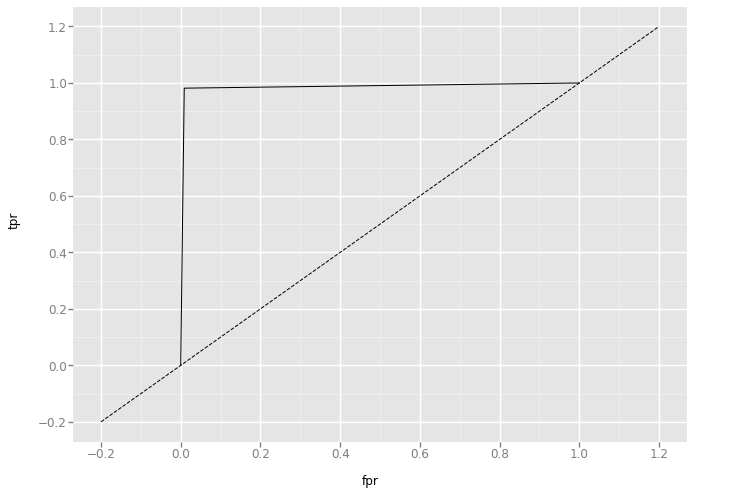

<ggplot: (80150868429)>

In [246]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('XGBoost Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

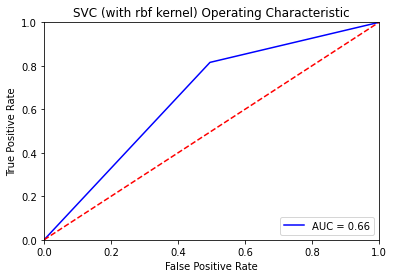

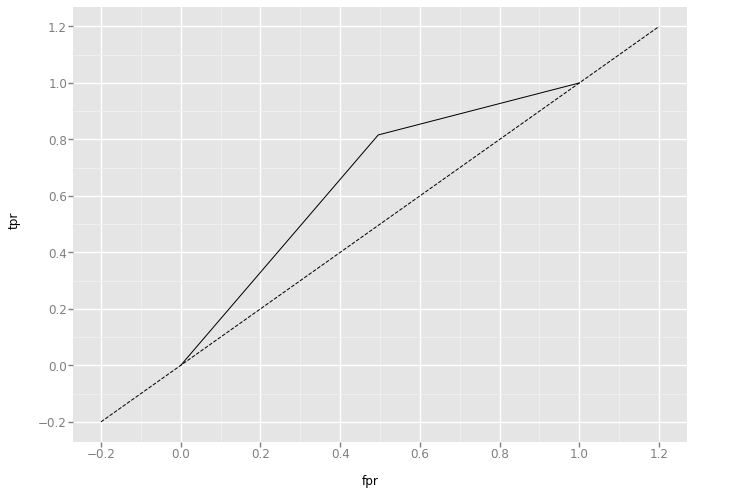

<ggplot: (80158677529)>

In [247]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_svc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('SVC (with rbf kernel) Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

From the results pf the graph and the classification report we can see that the XGBoost classifier had the best result amongst the models, the voting ensemble model was second best. The highest recall, precision and accuracy and f1 scores were from xgboost model and the voting ensemble model performed really well as well. amongst the four models the poorest was the svc classifier with rbf kernel. The Keras model performed the lowest overall as it was somehow failing to predict the true positives but however, was able to detect the true negatives very well. Changing the activation and dropout does change the accuracy result by large amounts (20%), it needs to be evaluated further to draw more conclusions.